# Titanic

In [56]:
import pandas as pd

In [57]:
df = pd.read_csv('train.csv')
df.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [58]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [59]:
df.shape

(891, 12)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
#Valores ausentes
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
with pd.option_context("float_format", "{:.2f}".format):
    display(df.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [63]:
df.sort_values("Age")[["Name","Age", "Survived"]].head(20)

,Name,Age,Survived
803,"Thomas, Master. Assad Alexander",0.42,1
755,"Hamalainen, Master. Viljo",0.67,1
644,"Baclini, Miss. Eugenie",0.75,1
469,"Baclini, Miss. Helene Barbara",0.75,1
78,"Caldwell, Master. Alden Gates",0.83,1
831,"Richards, Master. George Sibley",0.83,1
305,"Allison, Master. Hudson Trevor",0.92,1
386,"Goodwin, Master. Sidney Leonard",1.00,0
172,"Johnson, Miss. Eleanor Ileen",1.00,1
183,"Becker, Master. Richard F",1.00,1


In [64]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [65]:
df.describe(exclude="number")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [66]:
df['Sex'].unique()


array(['male', 'female'], dtype=object)

In [67]:

df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [68]:
df['FamilySize']= df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['IsAlone'].unique()

array([0, 1])

In [69]:
df['IsAlone'].describe()

count    891.000000
mean       0.602694
std        0.489615
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: IsAlone, dtype: float64

In [70]:
pd.crosstab(df['Sex'], df['Survived'], normalize='index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [71]:
pd.crosstab(df['IsAlone'], df['Survived'], normalize='index')

Survived,0,1
IsAlone,,
0,0.494350,0.505650
1,0.696462,0.303538


In [72]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
IsAlone          0
dtype: int64

In [73]:
#valores mais frequentes
print(df['Embarked'].value_counts())

# Preencher com a moda
df.fillna({'Embarked': df['Embarked'].mode()[0]}, inplace=True)


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [74]:
# Criar coluna 'Title'
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Padronizar títulos menos comuns
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace(['Mme', 'Mr'], 'Mrs')
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Dona', 'Sir', 'Don', 'Jonkheer'], 'Royalty')
df['Title'] = df['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev', ''], 'Officer')

# Preencher valores ausentes de Age com a mediana por título
df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.mean()))

In [75]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySize       0
IsAlone          0
Title            0
dtype: int64

In [76]:
df.drop(columns='Cabin', inplace=True)

In [77]:
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
IsAlone        0
Title          0
dtype: int64

In [78]:
survival_rate = df['Survived'].mean()
print(f"Taxa de sobrevivência: {survival_rate:.2%}")

Taxa de sobrevivência: 38.38%


In [79]:
print(df.groupby('Pclass')['Survived'].mean())

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [80]:
print(df.describe())

print(df.describe(include=['object']))

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.807742    0.523008   
std     257.353842    0.486592    0.836071   13.284148    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   21.845638    0.000000   
50%     446.000000    0.000000    3.000000   30.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  FamilySize     IsAlone  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    1.904602    0.602694  
std      0.806057   49.693429    1.613459    0.489615  
min      0.000000    0.000000    1.000000    0.000000  
25%      0.000000    7.910400    1.000000    0.000000  
50%      0.000000   14.454200    

In [81]:
print(df['Survived'].value_counts())

print(df['Survived'].value_counts(normalize=True).map("{:.1%}".format))

Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    61.6%
1    38.4%
Name: proportion, dtype: object


In [82]:
print(df.groupby('Survived')['Age'].mean())
print(df.groupby('Survived')['Fare'].mean())

Survived
0    30.824001
1    28.176379
Name: Age, dtype: float64
Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


In [83]:
print(df.groupby('Title')['Survived'].mean().map("{:.1%}".format))

print(df.groupby('FamilySize')['Survived'].mean().map("{:.1%}".format))

print(df.groupby('IsAlone')['Survived'].mean().map("{:.1%}".format))

Title
Master     57.5%
Miss       70.3%
Mrs        28.1%
Officer    27.8%
Royalty    60.0%
Name: Survived, dtype: object
FamilySize
1     30.4%
2     55.3%
3     57.8%
4     72.4%
5     20.0%
6     13.6%
7     33.3%
8      0.0%
11     0.0%
Name: Survived, dtype: object
IsAlone
0    50.6%
1    30.4%
Name: Survived, dtype: object


## Gráficos

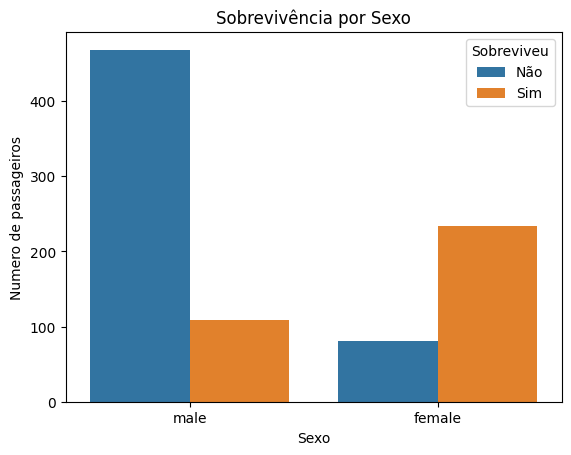

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='Sex', hue= 'Survived', data=df)
plt.title("Sobrevivência por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Numero de passageiros")
plt.legend(title="Sobreviveu", labels = ['Não', 'Sim'])
plt.show()

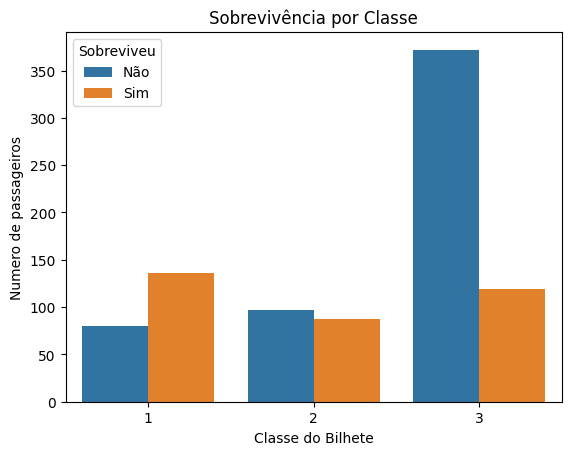

In [85]:
sns.countplot(x='Pclass', hue= 'Survived', data=df)
plt.title("Sobrevivência por Classe")
plt.xlabel("Classe do Bilhete")
plt.ylabel("Numero de passageiros")
plt.legend(title="Sobreviveu", labels = ['Não', 'Sim'])
plt.show()

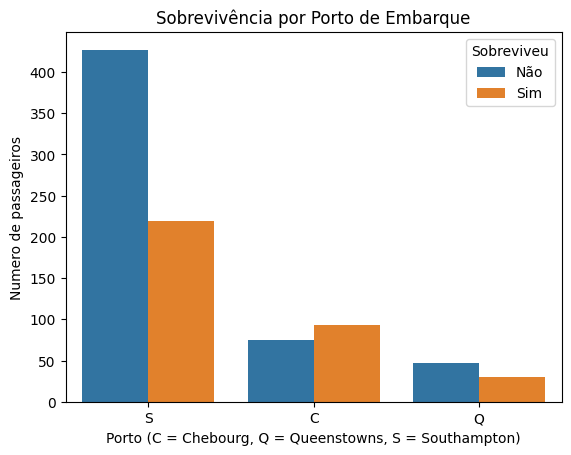

In [86]:
sns.countplot(x='Embarked', hue= 'Survived', data=df)
plt.title("Sobrevivência por Porto de Embarque")
plt.xlabel("Porto (C = Chebourg, Q = Queenstowns, S = Southampton)")
plt.ylabel("Numero de passageiros")
plt.legend(title="Sobreviveu", labels = ['Não', 'Sim'])
plt.show()

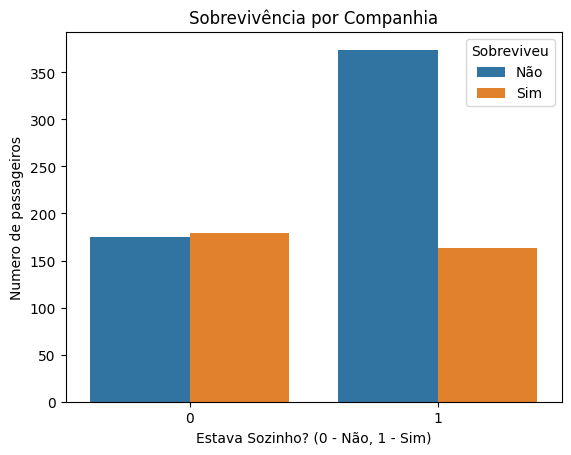

In [87]:
sns.countplot(x='IsAlone', hue= 'Survived', data=df)
plt.title("Sobrevivência por Companhia")
plt.xlabel("Estava Sozinho? (0 - Não, 1 - Sim)")
plt.ylabel("Numero de passageiros")
plt.legend(title="Sobreviveu", labels = ['Não', 'Sim'])
plt.show()

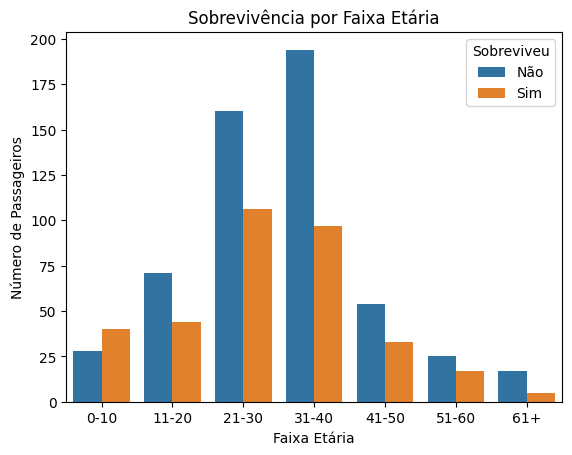

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Criar faixas etárias
df['FaixaEtaria'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 80], labels=[
    '0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61+'])

# Gráfico de barras lado a lado (countplot)
sns.countplot(data=df, x='FaixaEtaria', hue='Survived')
plt.title('Sobrevivência por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Passageiros')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()
